Question 8 -

Using the data from Question 5, write code the analyze the data and answer the following questions 

Note -

1. Draw plots to demonstrate the analysis for the following questions and better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

    ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
    ● Get all the episode names, whose average rating is more than 8 for every season
    ● Get all the episode names that aired before May 2019
    ● Get the episode name from each season with the highest and lowest rating
    ● Get the summary for the most popular ( ratings ) episode in every season


In [1]:
#Importing required modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# importing the csv file created in question 5.
data = pd.read_csv("westworld.csv")
data.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


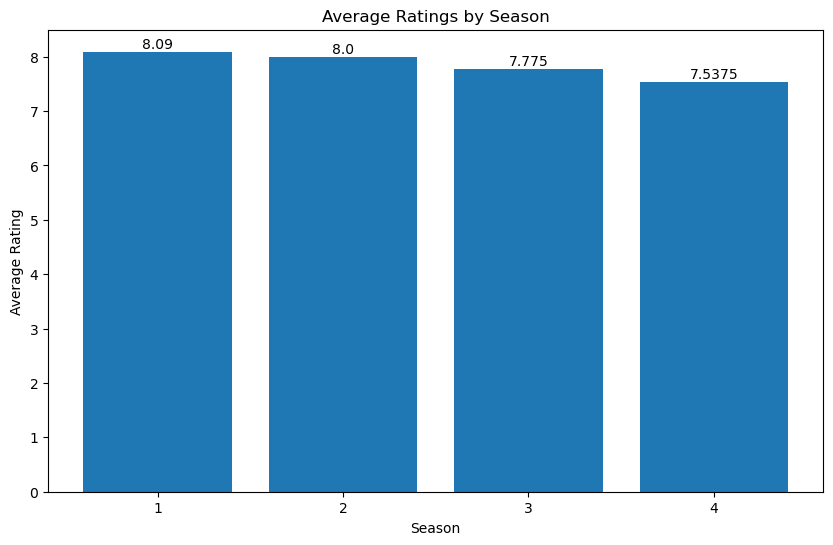

In [17]:
# Filtering the overall ratings for each season and using plots compare the ratings for all the seasons
season_ratings = data.groupby('season')['average rating'].mean().reset_index()

seasons = season_ratings['season']
ratings = season_ratings['average rating']
#Plotting the graph between Seasons and its corresponding average rating
plt.figure(figsize=(10, 6))
bars = plt.bar(seasons, ratings)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Season')
plt.xticks(seasons)
# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

Insight:

    Season 1 has highest average rating of 8.09 while Season 4 has lowest average rating of 7.55

In [41]:
# Group the data by season and episode, and check if all ratings are greater than 8 for each group
filtered_episodes = data.groupby(['season', 'number']).filter(lambda x: all(x['average rating'] > 8))

# Group the filtered episodes by season and get the episode names for each season
season_episode_names = filtered_episodes.groupby('season')['name'].unique()

# Print the episode names grouped by season
for season, episode_names in season_episode_names.items():
    print(f"Season {season} - Episode names:")
    for episode_name in episode_names:
        print(episode_name)
    print()


Season 1 - Episode names:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 - Episode names:
Kiksuya
Vanishing Point
The Passenger



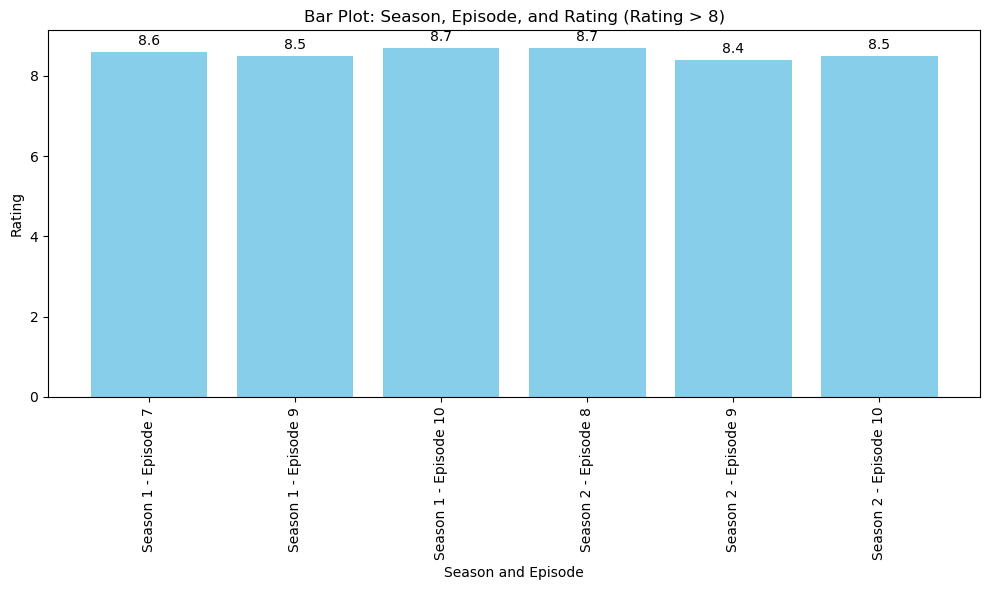

In [38]:
# Filter the data to include only episodes with a rating greater than 8
filtered_data = data[data['average rating'] > 8]

# Group the filtered data by season, episode, and rating
grouped_data = filtered_data.groupby(['season', 'number', 'average rating']).size().reset_index(name='count')

# Combine season and episode names
grouped_data['episode_name'] = 'Season ' + grouped_data['season'].astype(str) + ' - Episode ' + grouped_data['number'].astype(str)

# Plot the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar = ax.bar(grouped_data['episode_name'], grouped_data['average rating'], color='skyblue')

# Set axis labels and title
ax.set_xlabel('Season and Episode')
ax.set_ylabel('Rating')
ax.set_title('Bar Plot: Season, Episode, and Rating (Rating > 8)')

# Add data labels to the bars
for rect in bar:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Insight:

There are a total of 6 Episodes that are having the average rating above 8.

    Season-1, Episode-10 & Season-2, Episode 8 are having the highest rating of 8.7

Season 3 & Season 4 do not have any episodes that are rated above 8.


In [42]:
# Convert the 'airdate' column to datetime
data['airdate'] = pd.to_datetime(data['airdate'])

# Filter the data to include only episodes that aired before May 2019
filtered_data = data[data['airdate'] < pd.to_datetime('2019-05-01')]

# Get the episode names for the filtered data
episode_names = filtered_data['name']

# Print the episode names
for episode_name in episode_names:
    print(episode_name)


The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


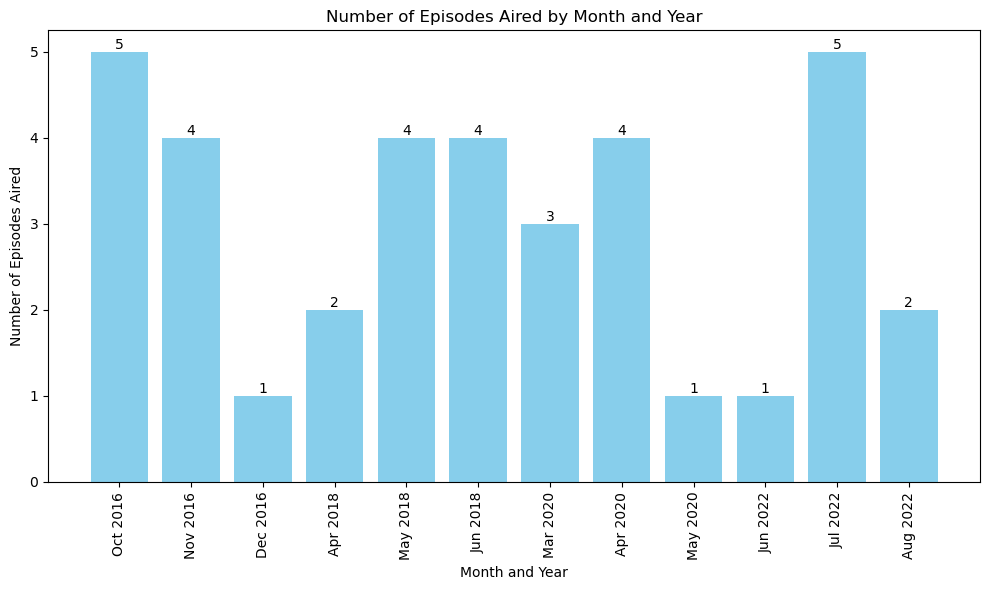

In [45]:

# Group the data by month and year and count the number of episodes
episode_counts = data.groupby(data['airdate'].dt.to_period('M')).size()

# Create the x-axis labels as month and year
x_labels = episode_counts.index.strftime('%b %Y')

# Plot the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(x_labels, episode_counts, color='skyblue')
plt.xlabel('Month and Year')
plt.ylabel('Number of Episodes Aired')
plt.title('Number of Episodes Aired by Month and Year')
plt.xticks(rotation=90)
# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
plt.tight_layout()
plt.show()


Insight: 

A total of 20 Episodes were aired before May 2019

In [46]:
# Get the episode with the highest rating for each season
highest_ratings = data.groupby('season')['average rating'].idxmax()
highest_episodes = data.loc[highest_ratings, ['season', 'name', 'average rating']]

# Get the episode with the lowest rating for each season
lowest_ratings = data.groupby('season')['average rating'].idxmin()
lowest_episodes = data.loc[lowest_ratings, ['season', 'name', 'average rating']]

# Print the episode name, season, and rating for the highest and lowest rated episodes
print("Highest Rated Episodes:")
print(highest_episodes[['season', 'name', 'average rating']])

print("\nLowest Rated Episodes:")
print(lowest_episodes[['season', 'name', 'average rating']])


Highest Rated Episodes:
    season                name  average rating
9        1  The Bicameral Mind             8.7
17       2             Kiksuya             8.7
20       3        Parce Domine             8.0
32       4            Zhuangzi             7.8

Lowest Rated Episodes:
    season          name  average rating
2        1     The Stray             7.6
14       2  Akane No Mai             7.6
25       3   Decoherence             7.5
28       4  The Auguries             7.1


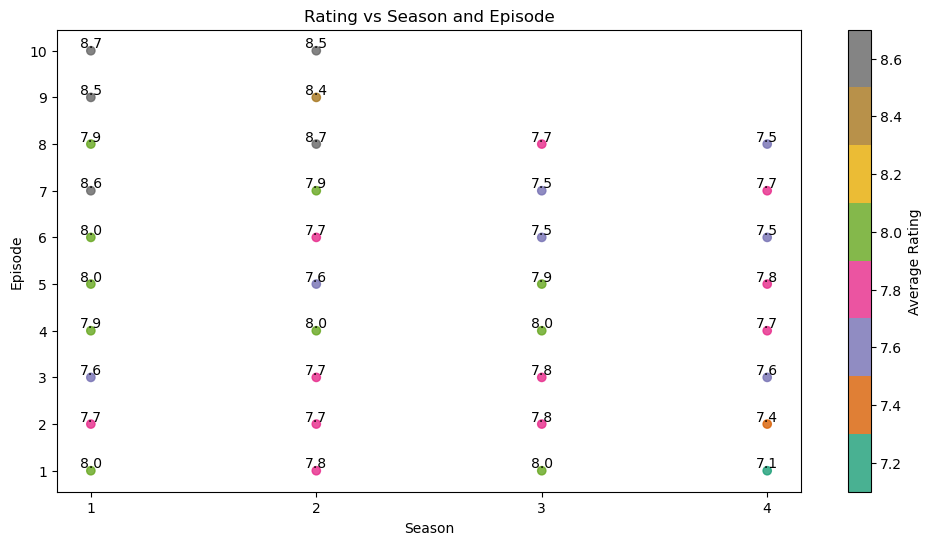

In [69]:
# Plot the graph
plt.figure(figsize=(12, 6))
plt.scatter(data['season'], data['number'], c=data['average rating'], cmap='Dark2', alpha=0.8)
cbar = plt.colorbar()
cbar.set_label('Average Rating')
plt.xlabel('Season')
plt.ylabel('Episode')
plt.title('Rating vs Season and Episode')
# Add data labels to the scatter plot
for i, rating in enumerate(data['average rating']):
    plt.text(data['season'][i], data['number'][i], str(rating), ha='center', va='bottom')

# Set the x-axis tick locations
plt.xticks(range(1, max(data['season']) + 1))

plt.yticks(range(1, max(data['number']) + 1))

plt.show()


Insight:

    For Season-1 The highest average rating is 8.7 for episode 10 and minimum is 7.7 for episode 02

    For Season-2 The highest average rating is 8.7 for episode 08 and minimum is 7.6 for episode 05

    For Season-3 The highest average rating is 8.0 for episode 01 & episode 04 and minimum is 7.5 for episode 06 & episode 07

    For Season-4 The highest average rating is 7.8 for episode 05 and minimum is 7.1 for episode 01

In [75]:
# Group the data by season and find the row with the highest rating for each season
most_popular_episodes = data.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmax()])
print("Most Popular Episode:")
# Display the summary for the most popular episode in each season
for season, episode_data in most_popular_episodes.iterrows():
    
    print(f"Season {season} - Episode Name: {episode_data['name']}")
    print(f"Rating: {episode_data['average rating']}")
    print(f"summary: {episode_data['summary']}\n")



Most Popular Episode:
Season 1 - Episode Name: The Bicameral Mind
Rating: 8.7
summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2 - Episode Name: Kiksuya
Rating: 8.7
summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3 - Episode Name: Parce Domine
Rating: 8.0
summary: If you're stuck in a loop, try walking in a straight line.

Season 4 - Episode Name: Zhuangzi
Rating: 7.8
summary: God is bored.

